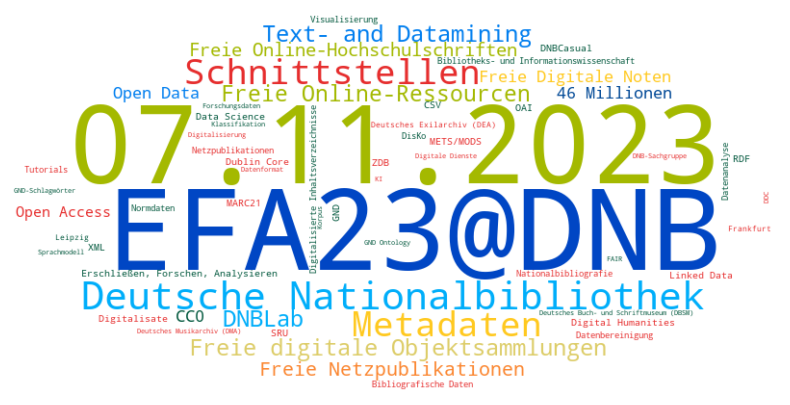

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image, ImageDraw
import numpy as np

# Wörter und Gewichtungen definieren
word_weights = {
    'EFA23@DNB': 5,
    '07.11.2023': 5,
    'Deutsche Nationalbibliothek': 5,
    'Metadaten': 4,
    'Schnittstellen': 4,
    'Freie digitale Objektsammlungen': 4,
    'Text- and Datamining': 4,
    'DNBLab': 4,
    'Freie Online-Ressourcen': 4,
    'Freie Netzpublikationen': 4,
    'Freie Online-Hochschulschriften': 4,
    'Freie Digitale Noten': 4,
    'Open Data': 4,
    '46 Millionen': 4,
    'CC0': 4,
    'Open Access': 3,
    'Erschließen, Forschen, Analysieren': 3,
    'SRU': 3,
    'OAI': 3,
    'MARC21': 3,
    'DNBCasual': 3,
    'Dublin Core': 3,
    'RDF': 3,
    'Linked Data': 3,
    'XML': 3,
    'METS/MODS': 3,
    'GND': 3,
    'ZDB': 3,
    'CSV': 3,
    'Digitalisate': 3,
    'Data Science': 3,
    'Digital Humanities': 3,
    'Bibliotheks- und Informationswissenschaft': 3,
    'Bibliografische Daten': 3,
    'Normdaten': 3,
    'Tutorials': 3,
    'Visualisierung': 3,
    'Datenbereinigung': 3,
    'Datenanalyse': 3,
    'Netzpublikationen': 3,
    'Digitalisierte Inhaltsverzeichnisse': 3,
    'Nationalbibliografie': 3,
    'DisKo': 3,
    'Frankfurt': 2,
    'Leipzig': 2,
    'Deutsches Exilarchiv (DEA)': 2,
    'Deutsches Buch- und Schriftmuseum (DBSM)': 2,
    'Deutsches Musikarchiv (DMA)': 2,
    'GND Ontology': 2,
    'Digitalisierung': 2,
    'FAIR': 2,
    'DNB-Sachgruppe': 2,
    'GND-Schlagwörter': 2,
    'DDC': 2,
    'Klassifikation': 2,
    'Datenformat': 2,
    'Forschungsdaten': 2,
    'Digitale Dienste': 2,
    'Korpus': 2,
    'KI': 2,
    'Sprachmodell': 2
}

# RGB-Farben für die Wörter definieren
word_colors = {
    'EFA23@DNB': (0, 70, 196),
    '07.11.2023': (164, 185, 0),
    'Deutsche Nationalbibliothek': (0, 174, 250),
    'Metadaten': (255, 201, 32),
    'Schnittstellen': (230, 46, 46),
    'Freie digitale Objektsammlungen': (221, 205, 105),
    'Text- and Datamining': (0, 126, 239),
    'DNBLab': (0, 174, 250),
    'Freie Online-Ressourcen': (164, 185, 0),
    'Freie Netzpublikationen': (251, 134, 48),
    'Freie Online-Hochschulschriften': (164, 185, 0),
    'Freie Digitale Noten': (255, 201, 32),
    'Open Data': (0, 126, 239),
    '46 Millionen': (0, 72, 150),
    'CC0': (0, 87, 60),
    'Open Access': (230, 46, 46),
    'Erschließen, Forschen, Analysieren': (0, 87, 60),
    'SRU': (230, 46, 46),
    'OAI': (0, 87, 60),
    'MARC21': (230, 46, 46),
    'DNBCasual': (0, 87, 60),
    'Dublin Core': (230, 46, 46),
    'RDF': (0, 87, 60),
    'Linked Data': (230, 46, 46),
    'XML': (0, 87, 60),
    'METS/MODS': (230, 46, 46),
    'GND': (0, 87, 60),
    'ZDB': (230, 46, 46),
    'CSV': (0, 87, 60),
    'Digitalisate': (230, 46, 46),
    'Data Science': (0, 87, 60),
    'Digital Humanities': (230, 46, 46),
    'Bibliotheks- und Informationswissenschaft': (0, 87, 60),
    'Bibliografische Daten': (230, 46, 46),
    'Normdaten': (0, 87, 60),
    'Tutorials': (230, 46, 46),
    'Visualisierung': (0, 87, 60),
    'Datenbereinigung': (230, 46, 46),
    'Datenanalyse': (0, 87, 60),
    'Netzpublikationen': (230, 46, 46),
    'Digitalisierte Inhaltsverzeichnisse': (0, 87, 60),
    'Nationalbibliografie': (230, 46, 46),
    'DisKo': (0, 87, 60),
    'Frankfurt': (230, 46, 46),
    'Leipzig': (0, 87, 60),
    'Deutsches Exilarchiv (DEA)': (230, 46, 46),
    'Deutsches Buch- und Schriftmuseum (DBSM)': (0, 87, 60),
    'Deutsches Musikarchiv (DMA)': (230, 46, 46),
    'GND Ontology': (0, 87, 60),
    'Digitalisierung': (230, 46, 46),
    'FAIR': (0, 87, 60),
    'DNB-Sachgruppe': (230, 46, 46),
    'GND-Schlagwörter': (0, 87, 60),
    'DDC': (230, 46, 46),
    'Klassifikation': (0, 87, 60),
    'Datenformat': (230, 46, 46),
    'Forschungsdaten': (0, 87, 60),
    'Digitale Dienste': (230, 46, 46),
    'Korpus': (0, 87, 60),
    'KI': (230, 46, 46),
    'Sprachmodell': (0, 87, 60)
}

# Benutzerdefinierte ovale Maske erstellen
mask_size = (800, 400)  # Größe der Maske entsprechend der gewünschten Wordcloud-Größe
mask = Image.new(mode='RGB', size=mask_size, color='white')
draw = ImageDraw.Draw(mask)
draw.ellipse((0, 0, mask_size[0]-1, mask_size[1]-1), fill='black')  # Ovale Form zeichnen

# Wordcloud-Objekt mit ovaler Maske erstellen
wordcloud = WordCloud(background_color='white', mask=np.array(mask))

# Wörter und Gewichtungen in die Wordcloud einfügen
wordcloud.generate_from_frequencies(word_weights)

# Farbskala für die Wörter definieren
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in word_colors:
        return f'rgb({word_colors[word][0]},{word_colors[word][1]},{word_colors[word][2]})'
    else:
        return 'black'

# Farbpalette für die Wordcloud setzen
wordcloud.recolor(color_func=color_func)

# Wordcloud anzeigen
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud.recolor(color_func=color_func, random_state=42), interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.jpg', format='jpg')
plt.show()
